In [179]:
# imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize

In [180]:
# 1 quantum register to hold 3 quantum bits
qr = QuantumRegister(3, name = 'q')

# 2 classical registers to hold 1 classical bit each
crz = ClassicalRegister(1, name = 'crz')
crx = ClassicalRegister(1, name = 'crx')

# building the quantum circuit
qc = QuantumCircuit(qr, crz, crx)

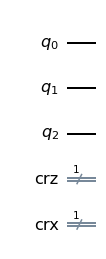

In [181]:
# drawing the circuit - blank at the moment
qc.draw(output = 'mpl')

There are three parts to quantum entanglement. The idea is to take the qubit state from q0 and teleport it to q2. Let's split up our qubits. q0 and q1 are Alice's qubit's in her lab while q2 is Bob's qubit in his lab.

In Step #1, Alice's second qubit q1 gets entangled with Bob's qubit q2.

In Step #2, Alice manipulates her q0 and q1 in some way through quantum gates, and then collapses her q1 into a classical bit.

In Step #3, Alice tells Bob the results of her collapsed qubit (now classical bit) and Bob does 1 of 4 things, ultimately recieving the teleported qubit state from q0.

In [182]:
# Step 1: entangle qubits

# begin by entangling q1 and q2 by putting them into a bell state
qc.h(1)
qc.cx(1,2)
qc.barrier() # used for visualization

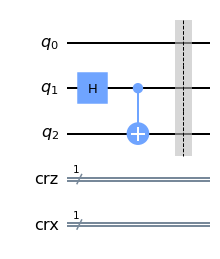

In [183]:
# visualize entangled states
qc.draw(output = 'mpl')

In [184]:
# Step 2: apply gates to Alice's qubits

# first apply a CNOT between qubit 0 and 1, and then apply a hadamard on her original qubit
qc.cx(0,1)
qc.h(0)
qc.barrier() # used for visualization

In [185]:
# measure the first qubit on across z (on the z basis)
qc.measure(0, crz)

# measure the second qubit across x (on the x basis)
qc.measure(1, crx)

qc.barrier() # used for visualization

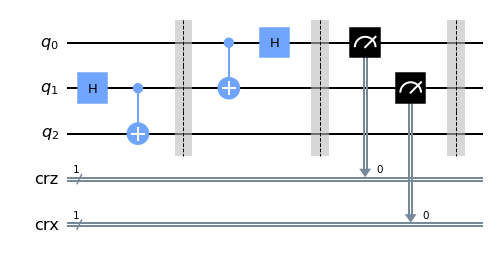

In [186]:
qc.draw(output = 'mpl')

In [187]:
# Step 3: apply gates to Bob's qubit

# flip Bob's qubit across Z if Alice's qubit 0 measures a 1 for z
qc.z(2).c_if(crz, 1)

# flip Bob's qubit across X if Alice's qubit 1 measures a 1 for x
qc.x(2).c_if(crx, 1)

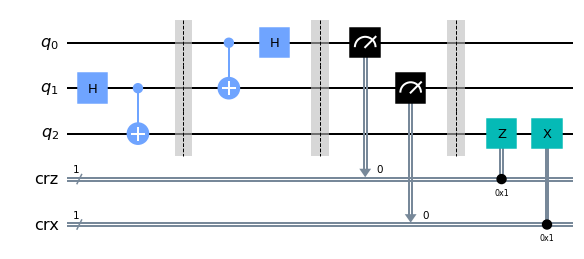

In [188]:
qc.draw(output = 'mpl')

We should be done now! To test this, we're going to run a simulator. What we expect SHOULD happen is that q2 should remain constant regardless of what q0 and q1 are. This would show that the state of the qubit q0 has now been teleported to q2, thus proving the theory of quantum information teleportation.

Essentially, Alice is able to teleport the information from HER qubit to BOB'S qubit, no matter how far they are (Bob's lab could be all the way at the moon and it wouldn't matter). All they need is to have 1 qubit that's entangled with one another.

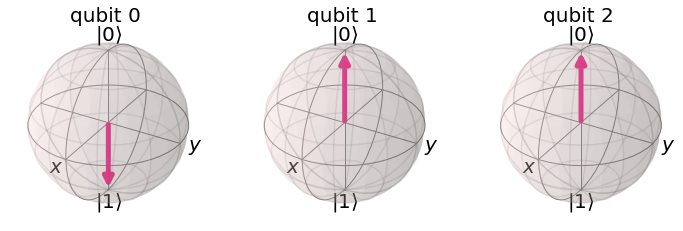

In [189]:
sim = Aer.get_backend("statevector_simulator") # setting up simulator to grab the statevector
qobj = assemble(qc)
result = sim.run(qobj).result().get_statevector() # grab the statevectors
plot_bloch_multivector(result) # plotting the statevectors

If you run the previous block of code a bunch of times, you'll notice that q0 and q1 constantly change but q2 remains constant no matter what (at the state 0). This means that the original 0 state of qubit 0 has been permanantely teleported to qubit 2.

However, this was a little underwhelming since q0 started off initialized with 0. Instead of initializing it at 0, let's try something a little bit cooler.

In [190]:
# recreate the circuit from above but clean it up by putting it all together
qr = QuantumRegister(3, name = 'q')
crz = ClassicalRegister(1, name = 'crz')
crx = ClassicalRegister(2, name = 'crx')
qc = QuantumCircuit(qr, crz, crx)

# initial state of qubit (psi) - make sure that the state is normalized
psi = [1/np.sqrt(2), 1/np.sqrt(2)]
init = Initialize(psi)
init.label = "initialization"

# setup the circuit, just like before
qc.h(1)
qc.cx(1,2)
qc.append(init, [0])
qc.barrier()

qc.cx(0, 1)
qc.h(0)
qc.barrier()

qc.measure(0, crz)
qc.measure(1, crx)
qc.barrier()

qc.z(2).c_if(crz, 1)
qc.x(2).c_if(crx, 1)

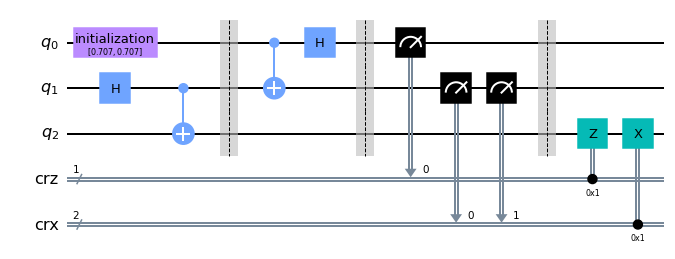

In [191]:
qc.draw(output = 'mpl')

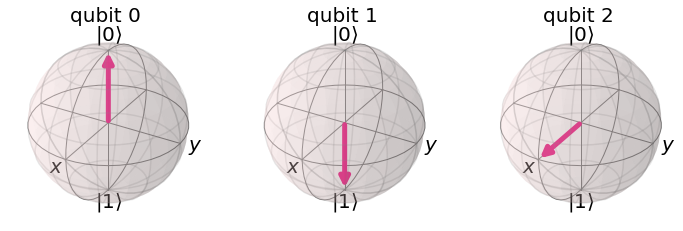

In [192]:
# simulation
qobj = assemble(qc)
result = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(result)

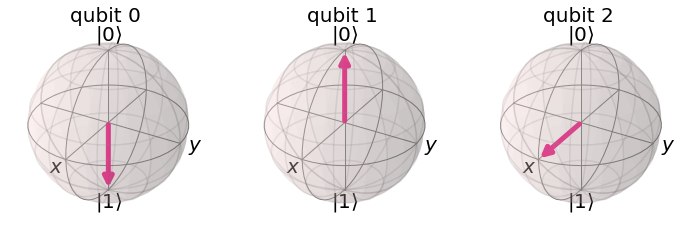

In [193]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

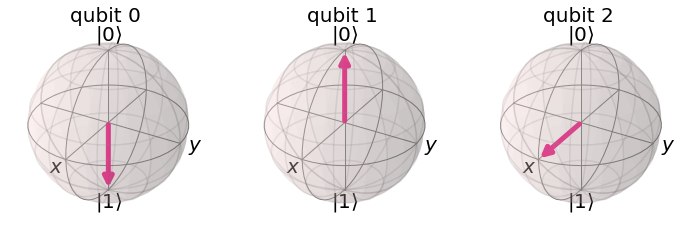

In [194]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

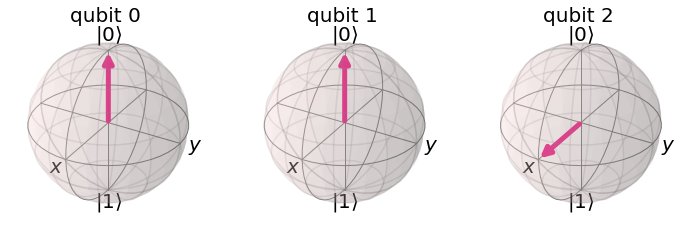

In [195]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

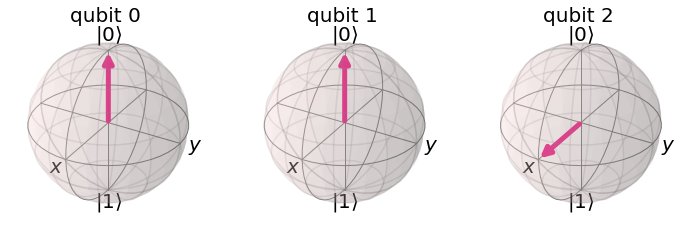

In [196]:
result = sim.run(qc).result().get_statevector()
plot_bloch_multivector(result)

As you can see from the various test runs above, qubit 1 and 0 vary but qubit 2 stays the exact same no matter the circumstance. Hence, the initial |+> state that qubit 0 started as was teleported to qubit 2! 